In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### Different Derivative Scheme

Given a simple problem 

$$\frac{du}{dt} = \lambda \cdot u(t)$$

The analytical solution is $$u(t) = c_1 \ e^{\lambda t}= u(0) \ e^{\lambda t}$$

where $u(t)$ is the initial condition.

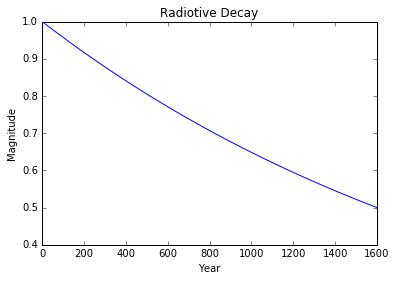

In [12]:
#Analytical Solution
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
u = lambda t: c_0 * numpy.exp(-decay_constant * t)
#Forcing function
f = lambda t: c_0 * -decay_constant * numpy.exp(-decay_constant * t)

#Specify Simulation time stamp
t = numpy.linspace(0.0, 1.6e3, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u(t), label="True Solution")
axes.set_title("Radiotive Decay")
axes.set_ylabel("Magnitude")
axes.set_xlabel("Year")
plt.show()

#### Forward Euler Method

Euler Forward method gives

$$\frac{d \vec u}{dt} = \frac{1}{\Delta t} [U_{n+1} - U_n] $$

Definition of ODE

$$\frac{d \vec u}{dt} = f(t, \vec u)$$

Therefore,

$$\frac{1}{\Delta t} [U_{n+1} - U_n] = f(t, \vec u)$$

$$U_{n+1} = U_n + \Delta t f(t, \vec u)$$

In [2]:
delta_t = 1e-1
N = int((t[-1] - t[0]) / delta_t + 1)

U = numpy.empty((N,2))
U[0] = u(t[0]) #Initial Condition
for n in xrange(0,N-1):
    U[n+1, 0] = delta_t * float(n)
    U[n+1, 1] = U[n, 1] + delta_t * f(U[n+1, 0])
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u(t), label="True Solution")
axes.plot(U[:,0],U[:,1], 'r', label = "forward Euler")
axes.set_title("Radiotive Decay")
axes.set_ylabel("Magnitude")
axes.set_xlabel("Year")
axes.legend(loc = 3)
plt.show()

NameError: name 't' is not defined

In [6]:
delta_t = 1e-1
N = int((t[-1] - t[0]) / delta_t + 1)

U = numpy.empty((N,2))
U[0] = u(t[0]) #Initial Condition
for n in xrange(0,N-1):
    U[n+1, 0] = delta_t * float(n)
    U[n+1, 1] = U[n, 1] + delta_t * f(U[n+1, 0])

def forward_euler(t, f):
    N = int((t[-1] - t[0]) / dt + 1)
    U = numpy.empty(N)
    U[0] = f(t[0])
    for n in xrange(0,N-1):
        U[n+1] = U[n] + dt * f(U[n+1])
    

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u(t), label="True Solution")
axes.plot(U[:,0],U[:,1], 'r', label = "forward Euler")
axes.set_title("Radiotive Decay")
axes.set_ylabel("Magnitude")
axes.set_xlabel("Year")
axes.legend(loc = 3)
plt.show()

NameError: name 't' is not defined

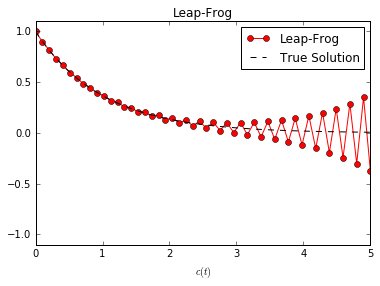

In [9]:
c_0 = 1.0
decay_constant = 1.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 5.0, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement leap-frog
# t_leapfrog = numpy.linspace(0.0, 5.0, 25)
t_leapfrog = numpy.linspace(0.0, 5.0, 50)
delta_t = t_leapfrog[1] - t_leapfrog[0]
u_leapfrog = numpy.empty(t_leapfrog.shape)
u_leapfrog[0] = c_0
u_leapfrog[1] = u_leapfrog[0] + delta_t * f(t_leapfrog[0], u_leapfrog[0]) #forward Euler
for n in xrange(1, t_leapfrog.shape[0] - 1):
    u_leapfrog[n + 1] = u_leapfrog[n - 1] + 2.0 * delta_t * f(t_leapfrog[n], u_leapfrog[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_leapfrog, u_leapfrog, 'or-', label="Leap-Frog")
axes.plot(t_exact, u_exact, 'k--', label="True Solution")

axes.set_title("Leap-Frog")
axes.set_xlabel("t (years)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((-1.1,1.1))
axes.legend()
plt.show()